**Notebook** realizado por: Rui Roque nº42720 e Tomás Dias nº42784

# **Apresentação & Análise**

Este trabalho prático tem como **objetivo** encontrar o melhor modelo para prever quais os alunos se encontram em risco de abandonar os estudos. O trabalho está realizado em formato de competição InClass com os seguintes [detalhes.](https://www.kaggle.com/c/student-success-uevora/overview)

De seguida, será analisado o [conjunto de dados](https://www.kaggle.com/c/student-success-uevora/data) disponibilizado.

Primeirarmente, foram realizados os imports necessários.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Imports realizados!")

Imports realizados!


Leitura dos dados de treino utilizados.

In [2]:
data_train = pd.read_csv("train.csv", header=0)
data_train.shape

(1846, 32)

Exploração dos dados de treino.

In [3]:
data_train.head()

,Id,Program,Y0s1_enrol,Y0s2_enrol,Y1s1_enrol,Y1s1_complete,Y1s1_grade,Y1s2_enrol,Y1s2_complete,Y1s2_grade,...,Y4s1_enrol,Y4s1_complete,Y4s1_grade,Y4s2_enrol,Y4s2_complete,Y4s2_grade,Rest_enrol,Rest_complete,Rest_grade,Failure
0,131386709,Management,46.0,30.0,36.5,36.5,11.452,36.0,36.0,13.236,...,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0
1,111354305,Nursing,30.0,24.0,30.0,30.0,14.933,30.0,30.0,17.333,...,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0
2,111345828,Nursing,30.0,40.0,26.0,26.0,17.000,20.0,10.0,16.000,...,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0
3,131393682,Biology,0.0,6.0,20.0,14.0,12.286,12.0,0.0,0.000,...,28.0,28.0,11.75,42.0,36.0,11.833,0.0,0.0,0.0,0
4,131383677,Informatics,41.0,36.0,36.0,19.0,14.053,48.0,30.0,12.400,...,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0


Leitura dos dados de teste utilizados.

In [4]:
data_test = pd.read_csv("test.csv", header=0)
data_test.shape

(792, 31)

Exploração dos dados de teste.

In [5]:
data_test.head()

,Id,Program,Y0s1_enrol,Y0s2_enrol,Y1s1_enrol,Y1s1_complete,Y1s1_grade,Y1s2_enrol,Y1s2_complete,Y1s2_grade,...,Y3s2_grade,Y4s1_enrol,Y4s1_complete,Y4s1_grade,Y4s2_enrol,Y4s2_complete,Y4s2_grade,Rest_enrol,Rest_complete,Rest_grade
0,131394910,Management,39.0,29.5,27.0,6.0,10.000,42.0,0.0,0.000,...,0.000,41.5,0.0,0.0,29.0,10.0,10.8,143.0,0.0,0.0
1,131391329,Biology,23.0,24.0,32.0,28.0,13.143,40.0,30.0,14.000,...,12.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,111345779,Nursing,30.0,30.0,26.0,26.0,15.192,30.0,30.0,16.000,...,13.067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,131382288,Management,30.0,30.0,30.0,30.0,14.900,30.0,30.0,15.200,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,131379697,Nursing,30.0,30.0,30.0,30.0,14.567,30.0,30.0,15.667,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Análise da target variable ***Failure*** em relação aos ECTs inscritos e concluídos por cada aluno, sem ter em consideração o ano atual, representada pelo gráfico seguinte.

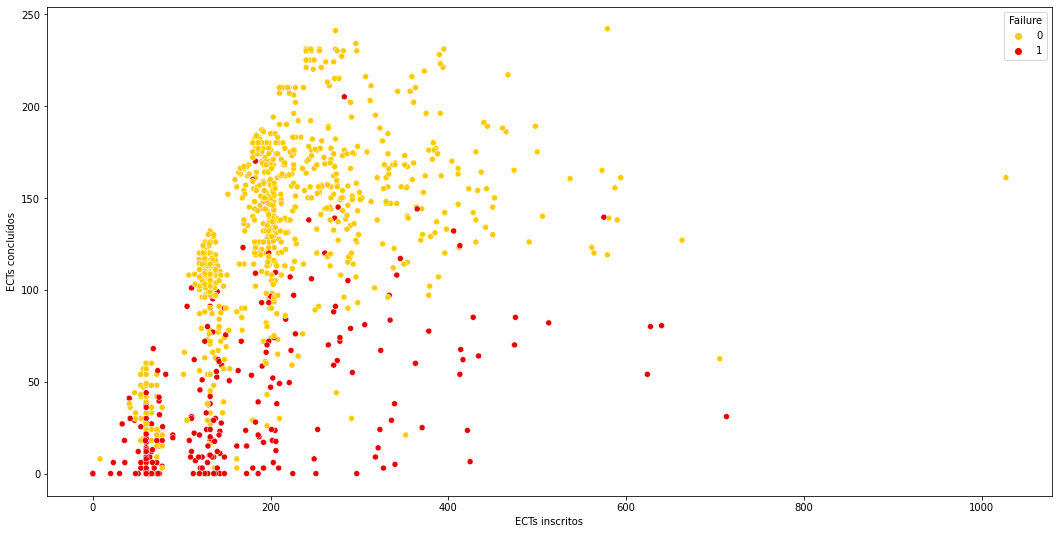

In [6]:
year_enrol = pd.DataFrame(data_train, columns=["Y1s1_enrol", "Y1s2_enrol", "Y2s1_enrol", "Y2s2_enrol", "Y3s1_enrol", "Y3s2_enrol", "Y4s1_enrol", "Y4s2_enrol", "Rest_enrol"])
year_complete = pd.DataFrame(data_train, columns=["Y1s1_complete", "Y1s2_complete", "Y2s1_complete", "Y2s2_complete", "Y3s1_complete", "Y3s2_complete", "Y4s1_complete", "Y4s2_complete", "Rest_complete"])

plt.figure(figsize = (18, 9))
plt.xlabel("ECTs inscritos")
plt.ylabel("ECTs concluídos")
sns.scatterplot(data=data_train, x=year_enrol.sum(axis=1), y=year_complete.sum(axis=1), hue="Failure", palette="hot_r")
plt.show()

É possível reparar um aglomerado de alunos que **abandonoram** os estudos, principalmente quando o número de ECTs concluídos por estes é **igual ou inferior a 50**. Por outro lado, a maioria dos alunos que concluíram **100 ou mais** ECTs **não abandonaram** os estudos.

Foi também analisado o número de alunos que abandonaram e não abandonaram os estudos em cada curso, representado pelo seguinte histograma.

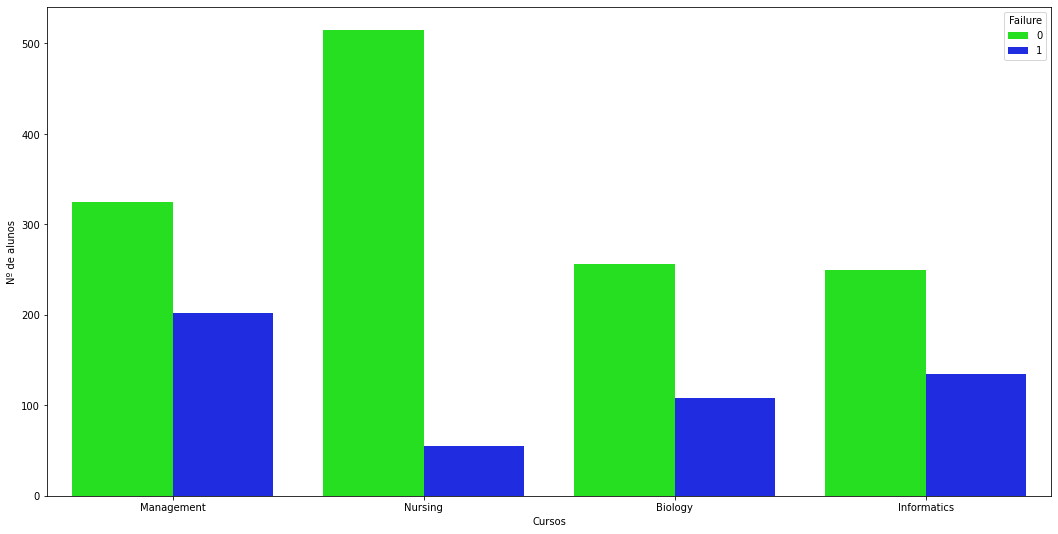

In [7]:
plt.figure(figsize = (18, 9))
sns.countplot(data=data_train, x="Program", hue="Failure", palette="hsv")
plt.xlabel("Cursos")
plt.ylabel("Nº de alunos")
plt.show()

Observa-se em todos os cursos que existem mais alunos que **não abandonaram** os estudos do que aqueles que **abandonaram**, sendo essa diferença mais significativa no curso *Nursing*. Já no curso *Management* foi onde se verificou o maior número de alunos que **abandonaram** os estudos. Nos cursos *Biology* e *Informatics* a proporção de alunos que **não abandonaram** e que **abandonaram** os estudos é semelhante.

# Experiências Realizadas

Para a realização das respetivas experiências, o conjunto de dados de treino e teste foram devidamente preparados.

In [8]:
xdata_train = data_train.drop(columns=["Id", "Failure"])
xdata_train.head()

xdata_test = data_test.drop(columns=["Id"])
xdata_test.head()

ydata_train = data_train["Failure"]
ydata_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Failure, dtype: int64

Foi necessário codificar os valores do atributo *Program* de modo a poderem ser utilizados na construção de modelos.

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
xdata_train["Program"] = label_encoder.fit_transform(xdata_train["Program"])
xdata_train.head()

,Program,Y0s1_enrol,Y0s2_enrol,Y1s1_enrol,Y1s1_complete,Y1s1_grade,Y1s2_enrol,Y1s2_complete,Y1s2_grade,Y2s1_enrol,...,Y3s2_grade,Y4s1_enrol,Y4s1_complete,Y4s1_grade,Y4s2_enrol,Y4s2_complete,Y4s2_grade,Rest_enrol,Rest_complete,Rest_grade
0,2,46.0,30.0,36.5,36.5,11.452,36.0,36.0,13.236,30.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0
1,3,30.0,24.0,30.0,30.0,14.933,30.0,30.0,17.333,30.0,...,11.967,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0
2,3,30.0,40.0,26.0,26.0,17.000,20.0,10.0,16.000,32.0,...,13.233,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0
3,0,0.0,6.0,20.0,14.0,12.286,12.0,0.0,0.000,14.0,...,13.636,28.0,28.0,11.75,42.0,36.0,11.833,0.0,0.0,0.0
4,1,41.0,36.0,36.0,19.0,14.053,48.0,30.0,12.400,33.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0


In [10]:
xdata_test["Program"] = label_encoder.fit_transform(xdata_test["Program"])
xdata_test.head()

,Program,Y0s1_enrol,Y0s2_enrol,Y1s1_enrol,Y1s1_complete,Y1s1_grade,Y1s2_enrol,Y1s2_complete,Y1s2_grade,Y2s1_enrol,...,Y3s2_grade,Y4s1_enrol,Y4s1_complete,Y4s1_grade,Y4s2_enrol,Y4s2_complete,Y4s2_grade,Rest_enrol,Rest_complete,Rest_grade
0,2,39.0,29.5,27.0,6.0,10.000,42.0,0.0,0.000,35.5,...,0.000,41.5,0.0,0.0,29.0,10.0,10.8,143.0,0.0,0.0
1,0,23.0,24.0,32.0,28.0,13.143,40.0,30.0,14.000,36.0,...,12.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,30.0,30.0,26.0,26.0,15.192,30.0,30.0,16.000,26.0,...,13.067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,30.0,30.0,30.0,30.0,14.900,30.0,30.0,15.200,30.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,30.0,30.0,30.0,30.0,14.567,30.0,30.0,15.667,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Procedeu-se à divisão do conjunto de treino em dados para construir e treinar os modelos e dados para validação.  

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xdata_train, ydata_train, random_state=42)

Na tentativa de procurar o melhor modelo, escolheu-se e testou-se vários modelos base.

In [12]:
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.svm import SVC, SVR
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

# Lasso
lasso = Lasso(alpha=0.01).fit(x_train, y_train)
lasso_y_pred = lasso.predict(x_val)

# Linear Regression
linreg = LinearRegression().fit(x_train, y_train)
linreg_y_pred = linreg.predict(x_val)

# Ridge
ridge = Ridge(alpha=1.0).fit(x_train, y_train)
ridge_y_pred = ridge.predict(x_val)

# SVR
svr = SVR(C=0.01).fit(x_train, y_train)
svr_y_pred = svr.predict(x_val)


# Modelos analisados com mais detalhe de seguida

# logreg = LogisticRegression()
# svc = SVC()
# rf = RandomForestClassifier()
# et = ExtraTreesClassifier()
# boosting = GradientBoostingClassifier()

A validação cruzada foi fundamental para o processo de escolha do melhor modelo e parâmetros. Para tal, optou-se pelas seguintes estratégias.


In [13]:
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit

# shuffle_split = ShuffleSplit()
# stratified_shuffle_split = StratifiedShuffleSplit()

Em junção com a validação cruzada utilizou-se o **Grid Search** para a afinação de parâmetros.

In [14]:
from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV()

Para a avaliação dos modelos utilizou-se os seguintes indicadores de desempenho.

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, precision_score, recall_score, f1_score

# Resultados da média de erro absoluta para os modelos construídos anteriormente

print("Mean Absolute Error - Lasso: {:.3f}".format(mean_absolute_error(y_val, lasso_y_pred)))
print("Mean Absolute Error - Linear Regression: {:.3f}".format(mean_absolute_error(y_val, linreg_y_pred)))
print("Mean Absolute Error - Ridge: {:.3f}".format(mean_absolute_error(y_val, ridge_y_pred)))
print("Mean Absolute Error - SVR: {:.3f}".format(mean_absolute_error(y_val, svr_y_pred)))


Mean Absolute Error - Lasso: 0.158
Mean Absolute Error - Linear Regression: 0.156
Mean Absolute Error - Ridge: 0.156
Mean Absolute Error - SVR: 0.179


# 5 Melhores Modelos - Setup & Desempenho

Após várias tentativas e testes, apurou-se os melhores modelos. Esta escolha baseou-se naturalmente pelo desempenho no que diz respeito à previsão dos valores de ***Failure***, mas também no quão diferenciados estes são entre si.

### Logistic Regression

Definiu-se inicialmente o modelo com os seguintes parâmetros.

In [16]:
logreg = LogisticRegression(max_iter=1000, random_state=0)

De entre todas as estratégias de validação cruzada testadas, a estratégia **ShuffleSplit** revelou ser a mais eficaz para este modelo.

In [17]:
shuffle_split = ShuffleSplit(test_size=.3, n_splits=10, random_state=0)

Escolheu-se um conjunto de valores para o parâmetro **C** e aplicou-se o **Grid Search**.

In [18]:
logreg_param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=shuffle_split)

Utilizou-se o conjunto de dados destinados ao treino do modelo e procurou-se o melhor valor para o parâmetro **C**.

In [19]:
logreg_grid_search.fit(x_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=None),
             estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

Os resultados do **Grid Search** foram os seguintes.

In [20]:
pd.concat([pd.DataFrame(logreg_grid_search.cv_results_["params"]),pd.DataFrame(logreg_grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,C,Accuracy
0,0.001,0.941106
1,0.010,0.943510
2,0.100,0.943990
3,1.000,0.943990
4,10.000,0.943990
5,100.000,0.943990


In [21]:
print("Melhor parâmetro: {}".format(logreg_grid_search.best_params_))

Melhor parâmetro: {'C': 0.1}


Avaliou-se o melhor modelo com os dados de validação, obtendo-se os seguintes resultados.

Exatidão: 0.939
Precisão: 0.929
Cobertura: 0.839
F1: 0.881


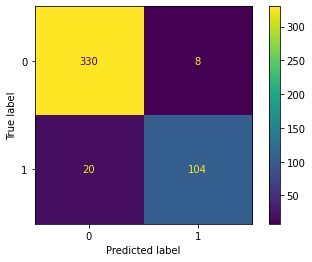

In [22]:
y_pred = logreg_grid_search.predict(x_val)

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Exatidão: {:.3f}".format(accuracy_score(y_val, y_pred)))
print("Precisão: {:.3f}".format(precision_score(y_val, y_pred)))
print("Cobertura: {:.3f}".format(recall_score(y_val, y_pred)))
print("F1: {:.3f}".format(f1_score(y_val, y_pred)))

Por fim, reconstrui-se o modelo utilizando o melhor parâmetro e o conjunto de dados de treino completo.

In [23]:
c = logreg_grid_search.best_params_["C"]

logreg = LogisticRegression(C=c, max_iter=1000, random_state=0).fit(xdata_train, ydata_train)

y_test = logreg.predict(xdata_test)

Este modelo obteve **0.94444** de **f1_score** para **30%** do conjunto de teste e **0.90034** para os restantes **70%**.

### SVM

Definiu-se inicialmente o modelo.

In [24]:
svm = SVC()

Utilizou-se a estratégia **ShuffleSplit** para este modelo.

In [25]:
shuffleSplit = ShuffleSplit(test_size=0.3, train_size=.7, n_splits=18, random_state=0)

Escolheu-se um conjunto de valores para os parâmetros **C** e **gamma** e aplicou-se o **Grid Search**.

In [26]:
svm_param_grid = {'C': [50, 1, 0.1, 0.01, 0.001],
                  'gamma': [0.000001,0.001, 0.01, 0.1, 1]}

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=shuffleSplit)


Utilizou-se o conjunto de dados destinados ao treino do modelo e procurou-se os melhores valores para os parâmetros **C** e **gamma**.

In [27]:
svm_grid_search.fit(x_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=18, random_state=0, test_size=0.3, train_size=0.7),
             estimator=SVC(),
             param_grid={'C': [50, 1, 0.1, 0.01, 0.001],
                         'gamma': [1e-06, 0.001, 0.01, 0.1, 1]})

Os resultados do **Grid Search** foram os seguintes:

In [28]:
pd.concat([pd.DataFrame(svm_grid_search.cv_results_["params"]),pd.DataFrame(svm_grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,C,gamma,Accuracy
0,50.000,0.000001,0.943643
1,50.000,0.001000,0.924012
2,50.000,0.010000,0.883681
3,50.000,0.100000,0.851496
4,50.000,1.000000,0.818910
5,1.000,0.000001,0.898905
6,1.000,0.001000,0.925080
7,1.000,0.010000,0.878339
8,1.000,0.100000,0.846287
9,1.000,1.000000,0.810363


In [29]:
print("Melhores parâmetros: {}".format(svm_grid_search.best_params_))

Melhores parâmetros: {'C': 50, 'gamma': 1e-06}


O desempenho de cada conjunto de parâmetros pode ser visualizado pelo **Heatmap** seguinte.

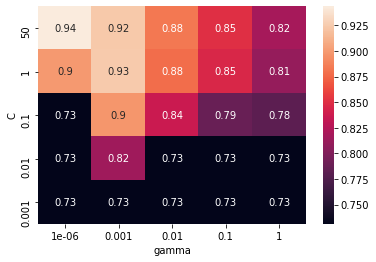

In [30]:
results = pd.DataFrame(svm_grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
ax = sns.heatmap(scores, xticklabels=svm_param_grid["gamma"], yticklabels=svm_param_grid["C"], annot=True)
plt.xlabel("gamma")
plt.ylabel("C")
plt.show()

É possível observar-se que ambos os parâmetros influenciam o resultado, podendo-se excluir os valores de **C** inferiores a 1. Os melhores resultados ocorrem quando o valor de **C** é alto e o valor **gamma** baixo.

Avaliou-se o melhor modelo com os dados de validação, obtendo-se os seguintes resultados.

Exatidão: 0.939
Precisão: 0.944
Cobertura: 0.823
F1: 0.879


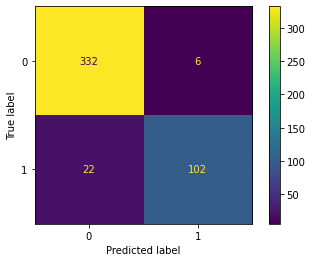

In [31]:
y_pred = svm_grid_search.predict(x_val)

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Exatidão: {:.3f}".format(accuracy_score(y_val, y_pred)))
print("Precisão: {:.3f}".format(precision_score(y_val, y_pred)))
print("Cobertura: {:.3f}".format(recall_score(y_val, y_pred)))
print("F1: {:.3f}".format(f1_score(y_val, y_pred)))

Por fim, reconstrui-se o modelo utilizando os melhores parâmetros e o conjunto de dados de treino completo.

In [32]:
c = svm_grid_search.best_params_["C"]
gamma = svm_grid_search.best_params_["gamma"]

svm = SVC(C=c, gamma=gamma, random_state=0).fit(xdata_train, ydata_train)

y_test = svm.predict(xdata_test)

Este modelo obteve **0.95774** de **f1_score** para **30%** do conjunto de teste e **0.89122** para os restantes **70%**.

### Random Forest

Definiu-se inicialmente o modelo.

In [33]:
rf = RandomForestClassifier()

Utilizou-se a estratégia **ShuffleSplit** para este modelo.

In [34]:
shuffleSplit = StratifiedShuffleSplit(n_splits=18, train_size=.75, random_state=42)

Escolheu-se um conjunto de valores para os parâmetros n_estimators e max_leaf_nodes e aplicou-se o Grid Search.

In [35]:
rf_param_grid = {'n_estimators': [200, 90, 30, 20, 10],
                 'max_leaf_nodes': [50, 100, 150, 200, 500]}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=shuffleSplit)

Verificou-se que as classes do conjunto de treino completo não eram balanceadas e de forma a equilibrá-lo, recorreu-se ao **SMOTE** para acrescentar exemplos com a classe minoritária.

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_sample(x_train, y_train)

Utilizou-se o conjunto de dados destinados ao treino do modelo e procurou-se o melhor valor para os parâmetros **n_estimators** e **max_leaf_nodes**.

In [37]:
rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=18, random_state=42, test_size=None,
            train_size=0.75),
             estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': [50, 100, 150, 200, 500],
                         'n_estimators': [200, 90, 30, 20, 10]})

Os resultados do **Grid Search** foram os seguintes:

In [38]:
pd.concat([pd.DataFrame(rf_grid_search.cv_results_["params"]),pd.DataFrame(rf_grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,max_leaf_nodes,n_estimators,Accuracy
0,50,200,0.951389
1,50,90,0.949846
2,50,30,0.949625
3,50,20,0.949405
4,50,10,0.946318
5,100,200,0.956239
6,100,90,0.956019
7,100,30,0.954255
8,100,20,0.953373
9,100,10,0.949846


In [39]:
print("Melhores parâmetros: {}".format(rf_grid_search.best_params_))

Melhores parâmetros: {'max_leaf_nodes': 500, 'n_estimators': 90}


O desempenho de cada conjunto de parâmetros pode ser visualizado pelo **Heatmap** seguinte.

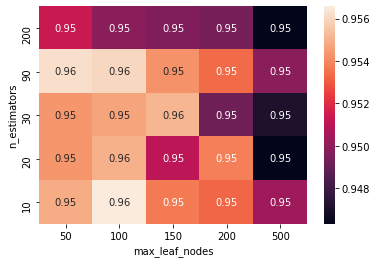

In [61]:
results = pd.DataFrame(rf_grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(5, 5)
ax = sns.heatmap(scores, xticklabels=rf_param_grid["max_leaf_nodes"], yticklabels=rf_param_grid["n_estimators"], annot=True)
plt.xlabel("max_leaf_nodes")
plt.ylabel("n_estimators")
plt.show()

Avaliou-se o melhor modelo com os dados de validação, obtendo-se os seguintes resultados.

Exatidão: 0.950
Precisão: 0.947
Cobertura: 0.863
F1: 0.903


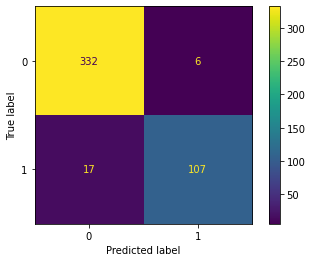

In [41]:
y_pred = rf_grid_search.predict(x_val)

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Exatidão: {:.3f}".format(accuracy_score(y_val, y_pred)))
print("Precisão: {:.3f}".format(precision_score(y_val, y_pred)))
print("Cobertura: {:.3f}".format(recall_score(y_val, y_pred)))
print("F1: {:.3f}".format(f1_score(y_val, y_pred)))

Por fim, reconstrui-se o modelo utilizando os melhores parâmetros e o conjunto de dados de treino completo.

In [42]:
rf_n_estimators = rf_grid_search.best_params_["n_estimators"]
rf_max_leaf_nodes = rf_grid_search.best_params_["max_leaf_nodes"]

rf = RandomForestClassifier(n_estimators=rf_n_estimators, max_depth=rf_max_leaf_nodes).fit(xdata_train, ydata_train)

y_test = rf.predict(xdata_test)

Este modelo obteve **0.96503** de **f1_score** para **30%** do conjunto de teste e **0.89965** para os restantes **70%**.

### Extra Trees

Definiu-se inicialmente o modelo.

In [43]:
et = ExtraTreesClassifier()

Utilizou-se a estratégia **ShuffleSplit** para este modelo.

In [44]:
shuffleSplit = ShuffleSplit(train_size=.7, n_splits=18, random_state=0)

Escolheu-se um conjunto de valores para os parâmetros n_estimators e max_depth e aplicou-se o Grid Search.

In [45]:
et_param_grid = {'n_estimators': [250, 80, 70, 30, 20, 10],
                 'max_depth': [10, 20, 22, 25, 30, 40]}

et_grid_search = GridSearchCV(et, et_param_grid, cv=shuffleSplit)

Utilizou-se o conjunto de dados destinados ao treino do modelo e procurou-se o melhor valor para os parâmetros **n_estimators** e **max_depth**.

In [46]:
et_grid_search.fit(x_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=18, random_state=0, test_size=None, train_size=0.7),
             estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [10, 20, 22, 25, 30, 40],
                         'n_estimators': [250, 80, 70, 30, 20, 10]})

Os resultados do **Grid Search** foram os seguintes:

In [47]:
pd.concat([pd.DataFrame(et_grid_search.cv_results_["params"]),pd.DataFrame(et_grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,max_depth,n_estimators,Accuracy
0,10,250,0.951148
1,10,80,0.951056
2,10,70,0.950597
3,10,30,0.950413
4,10,20,0.951056
5,10,10,0.946373
6,20,250,0.964004
7,20,80,0.963636
8,20,70,0.964279
9,20,30,0.961616


In [48]:
print("Melhores parâmetros: {}".format(et_grid_search.best_params_))

Melhores parâmetros: {'max_depth': 22, 'n_estimators': 250}


O desempenho de cada conjunto de parâmetros pode ser visualizado pelo **Heatmap** seguinte.

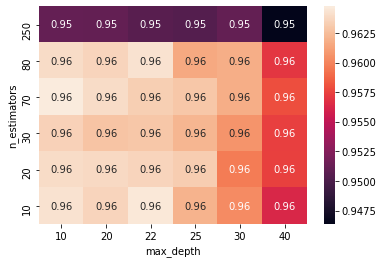

In [49]:
results = pd.DataFrame(et_grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
ax = sns.heatmap(scores, xticklabels=et_param_grid["max_depth"], yticklabels=et_param_grid["n_estimators"], annot=True)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.show()

Avaliou-se o melhor modelo com os dados de validação, obtendo-se os seguintes resultados.

Exatidão: 0.942
Precisão: 0.908
Cobertura: 0.871
F1: 0.889


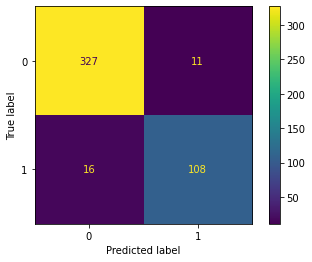

In [50]:
y_pred = et_grid_search.predict(x_val)

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Exatidão: {:.3f}".format(accuracy_score(y_val, y_pred)))
print("Precisão: {:.3f}".format(precision_score(y_val, y_pred)))
print("Cobertura: {:.3f}".format(recall_score(y_val, y_pred)))
print("F1: {:.3f}".format(f1_score(y_val, y_pred)))

Por fim, reconstrui-se o modelo utilizando os melhores parâmetros e o conjunto de dados de treino completo.

In [51]:
et_n_estimators = et_grid_search.best_params_["n_estimators"]
et_max_depth = et_grid_search.best_params_["max_depth"]

et = ExtraTreesClassifier(n_estimators=et_n_estimators, max_depth=et_max_depth).fit(xdata_train, ydata_train)

y_test = et.predict(xdata_test)

Este modelo obteve **0.95104** de **f1_score** para **30%** do conjunto de teste e **0.89655** para os restantes **70%**.

### Gradient Boosting

Definiu-se inicialmente o modelo.

In [52]:
gb = GradientBoostingClassifier()

Utilizou-se a estratégia **ShuffleSplit** para este modelo.

In [53]:
shuffleSplit = ShuffleSplit(train_size=.75, n_splits=18, random_state=42)

Escolheu-se um conjunto de valores para os parâmetros **n_estimators** ,**learning_rate** e **max_depth** e aplicou-se o Grid Search.

In [54]:
gb_param_grid = {'n_estimators': [10, 20, 30, 70, 90],
                 'max_depth': [1, 2, 3, 4, 5],
                 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}

gb_grid_search = GridSearchCV(gb, gb_param_grid, cv = shuffleSplit)

Utilizou-se o conjunto de dados destinados ao treino do modelo e procurou-se o melhor valor para os parâmetros **n_estimators**, **max_depth** e **learning_rate**.

In [55]:
gb_grid_search.fit(x_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=18, random_state=42, test_size=None, train_size=0.75),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 70, 90]})

Os resultados do **Grid Search** foram os seguintes:

In [56]:
pd.concat([pd.DataFrame(gb_grid_search.cv_results_["params"]),pd.DataFrame(gb_grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,learning_rate,max_depth,n_estimators,Accuracy
0,0.1,1,10,0.909281
1,0.1,1,20,0.916336
2,0.1,1,30,0.920414
3,0.1,1,70,0.934083
4,0.1,1,90,0.938051
...,...,...,...,...
120,0.5,5,10,0.948523
121,0.5,5,20,0.954916
122,0.5,5,30,0.956900
123,0.5,5,70,0.959656


In [57]:
print("Melhores parâmetros: {}".format(gb_grid_search.best_params_))

Melhores parâmetros: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 90}


Avaliou-se o melhor modelo com os dados de validação, obtendo-se os seguintes resultados.

Exatidão: 0.937
Precisão: 0.906
Cobertura: 0.855
F1: 0.880


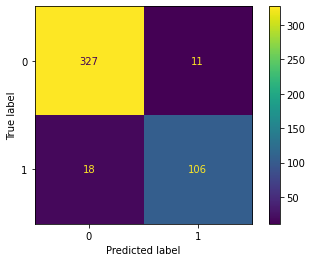

In [58]:
y_pred = gb_grid_search.predict(x_val)

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Exatidão: {:.3f}".format(accuracy_score(y_val, y_pred)))
print("Precisão: {:.3f}".format(precision_score(y_val, y_pred)))
print("Cobertura: {:.3f}".format(recall_score(y_val, y_pred)))
print("F1: {:.3f}".format(f1_score(y_val, y_pred)))

Por fim, reconstrui-se o modelo utilizando os melhores parâmetros e o conjunto de dados de treino completo.

In [59]:
gb_n_estimators = gb_grid_search.best_params_["n_estimators"]
gb_max_depth = gb_grid_search.best_params_["max_depth"]
gb_learning_rate = gb_grid_search.best_params_["learning_rate"]

gb = GradientBoostingClassifier(n_estimators=gb_n_estimators, max_depth=gb_max_depth, learning_rate=gb_learning_rate).fit(xdata_train, ydata_train)

y_test = gb.predict(xdata_test)

Este modelo obteve **0.95104** de **f1_score** para **30%** do conjunto de teste e **0.90784** para os restantes **70%**.

# Discussão & Conclusões

Tendo em consideração as características dos conjuntos de dados (treino e teste) nomeadamente por se tratarem de conjuntos com grande quantidade de atributos e exemplos, conclui-se que o uso de modelos baseados em árvores de decisão foram aqueles que melhor desempenho apresentaram, sendo estes o Random Forest, o Extra Trees e o Gradient Boosting.

Uma das características também observadas no conjunto de dados de treino é o facto de os dados não serem balanceados, como já referido anteriormente. A adição de exemplos com classe minoritária contribuiu para um ligeiro aumento de desempenho para os modelos baseados em árvores. Nos restantes modelos, o desempenho não só aumentou como piorou quando usados alguns valores para os parâmetros testados.

A validação cruzada revelou-se importante para a procura do melhor modelo, destacando-se a estratégia ShuffleSplit que acabou por ser a escolha para todos os modelos com melhor desempenho.

Verificou-se ainda uma diferença significativa de desempenho dos modelos no que diz respeito à previsão das classes para 30% do conjunto de teste em relação aos restantes 70%. Isto deveu-se provavelmente pelo foco dado à procura do melhor desempenho para 30% do conjunto, desenvolvendo modelos demasiado complexos e específicos (originando *overfitting*) para este conjunto e que não generalizavam tão bem para os restantes 70%.

A aleatoriedade dos algoritmos utilizados na procura dos melhores modelos permitiu atingir bons valores de desempenho mas também modelos demasiado complexos.